<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png" width="700"/>
</div>



<u> <h1> Presenting by:</h1></u>
<h4> Eliya Zaguri</h4>
<h4> Matan Vidal</h4>
<h4> Adar Saban</h4>

<u> <h1>Table of contents </h1></u>

1. [Arranging and clearing the data according to our needs](#section1)

2. [Key comprehension](#section2)

3. [First conclusion](#section3)

3. [Second conclusion](#section4)



In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

url='https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/aaa.csv.csv '
data=pd.read_csv(url)

# Organize and clearing the data according to our needs
<a id='section1'></a>

#### Checking the indentation of the column title

In [3]:
data.dtypes 

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Filling in missing values ​​for each sport in its field according to the average of that field.

In [4]:
data["Age"] = data.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))
data["Height"] = data.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.mean()))
data["Weight"] = data.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.mean()))

### Deletion of sports categories where the number of medals is low. Focus on popular sports.

In [7]:
data.Sport.unique()
data['Sport'].value_counts(ascending=True)
data=data.groupby('Sport').filter(lambda x : len(x)>100) 
data['Sport'].value_counts(ascending=False)

Athletics                    13587
Gymnastics                    8317
Swimming                      7959
Fencing                       4042
Shooting                      3911
Cycling                       3777
Rowing                        3595
Alpine Skiing                 3234
Cross Country Skiing          2875
Sailing                       2473
Football                      2462
Wrestling                     2388
Equestrianism                 2375
Boxing                        2140
Canoeing                      1947
Hockey                        1937
Speed Skating                 1657
Biathlon                      1622
Basketball                    1617
Ice Hockey                    1576
Water Polo                    1362
Judo                          1319
Art Competitions              1310
Weightlifting                 1254
Handball                      1234
Volleyball                    1080
Bobsleigh                     1045
Diving                         990
Tennis              

### Check that there are no cells with missing values. (Except what we want)

In [8]:
data.isnull().sum().sort_values(ascending=True)

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     78819
dtype: int64

<u><a id='section2'></a></u>
 # Key comprehension



### Presentation of the 10 countries with the most participants over the years.

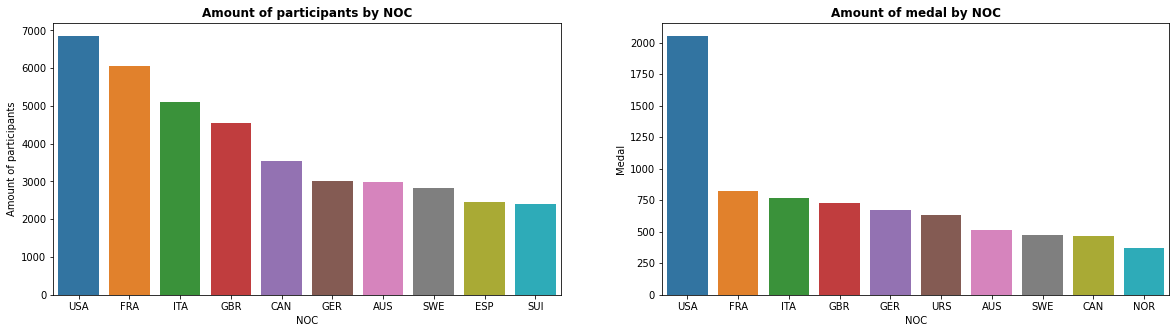

In [9]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
Top_10=pd.DataFrame(data[['NOC']].value_counts().sort_values(ascending=False).head(10).reset_index(name='Amount of participants'))
barpolt_amount_of_part=sns.barplot(data=Top_10,x='NOC',y='Amount of participants',ax=axes[0]);
Medal_by_countries=data.groupby(['NOC'])[['Medal']].count().sort_values(by='Medal',ascending=False).reset_index().head(10)
barplot_amount_of_medal=sns.barplot(data=Medal_by_countries,x='NOC',y='Medal',ax=axes[1]);
plt.subplots_adjust(wspace = 0.2)
barpolt_amount_of_part.set_title('Amount of participants by NOC',fontweight ="bold")
barplot_amount_of_medal.set_title('Amount of medal by NOC',fontweight ="bold")
plt.show()


# First conclusion
<a id='section3'></a>

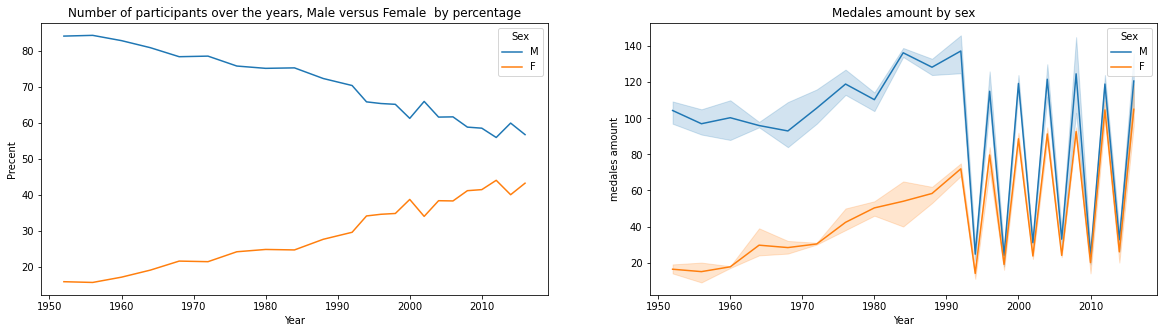

In [22]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
last_sixty_years=data[data.Year>=1950] 

data_by_sex_year=last_sixty_years.groupby('Year')[['Sex']].value_counts().reset_index(name='Participants')
data_by_sex_year['Precent']=data_by_sex_year.groupby('Year')['Participants'].transform(lambda x:(x/x.sum()*100))
first_conclusion=sns.lineplot(data=data_by_sex_year, x="Year", y="Precent", hue="Sex",markers=True,ax=axes[0]);
first_conclusion.set_title('Number of participants over the years, Male versus Female  by percentage');


g_medal_by_sex_year=last_sixty_years.groupby(['Sex','Year'])['Medal'].value_counts().reset_index(name='medales amount').sort_values(by='medales amount',ascending=False)
lineplot_Medal_amount_by_sex=sns.lineplot(data=g_medal_by_sex_year, x="Year", y="medales amount", hue="Sex",markers=True,ax=axes[1]);
plt.subplots_adjust(wspace = 0.2)
lineplot_Medal_amount_by_sex.set_title('Medales amount by sex');
plt.show()

# Second conclusion
<a id='section4'></a>

# בדקנו נתונים על ספורטאים וראינו שהשיא שלהם הוא בגיל 25 ומהדאטא שלפנו נתונים דומים ,אנו רואים באיור זה שגיל 23 שולט בכל סוגי המדליות   


דרופ אנד איי עמ לבדוק את הגיל למחוק את האנשים שלא זכו במדליות כי אנו בודקים את כמות המדליות עפ סוג בכל גיל.
בדיקה שבאמת מחקנו את את הערכים החסרים.
לקחנו מתחת לגיל 45 מכיוון ששם כמות המדליות היא אפסית.
גרופ ביי  - סכמנו את כמות האנשים באותו גיל שזכו באותה סוג מדליה
הלכנו בדרך השלילה ,כאשר אם היינו מקבצים גיל עפ סכימת סוגי המדליות היינו מקבלים את הגיל-וכמה מדליות זכה ללא שוני בסוג המדליה כאשר רצינו שתהיה הפרדה בין סוגי המדליות עפ גיל.  

<div>
<img src="https://www.nationalworld.com/webimg/b25lY21zOjc5YzVhNTNlLTUyM2MtNDVjOC1iYTI1LTQ2YzNkNTgxMjA4ZTphNTFmZmU0Mi1lY2Q2LTQ2OWMtOTk1Yi00ZTcxZTk5MTJhYTY=.jpg?&width=640" width="700"/>
</div>


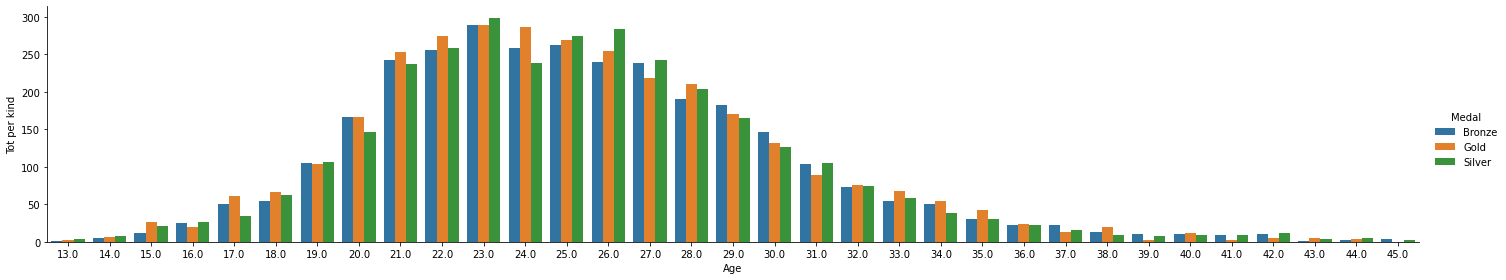

In [21]:
data_no_NaN=data.dropna()
data_no_NaN.isnull().sum().sort_values(ascending=False)
data_no_NaN=data_no_NaN[data_no_NaN.Age<=45].round()
data_Age_by_Medal=data_no_NaN.groupby('Medal')[['Age']].value_counts().reset_index(name='Tot per kind').round(1)
data_Age_by_Medal=pd.DataFrame(data_Age_by_Medal)
sns.catplot(data=data_Age_by_Medal,x="Age",y="Tot per kind",kind="bar",aspect=5,height=4,hue="Medal");

# מדד BMI הוא מדד הנותן הערכה כמותית האם אדם נמצא במשקל תקין, בעודף משקל או בתת משקל.
נבדוק האם יש קשר בין מדד זה לזכייה במדליות מכלל הסוגים באולימפיאדה.

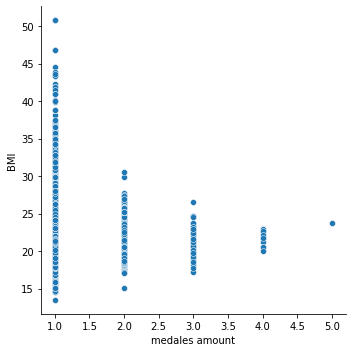

In [15]:
data_of_medal_by_id=data.groupby(['ID','Age','Height','Weight'])['Medal'].value_counts().reset_index(name='medales amount')
data_with_BMI=data_of_medal_by_id.assign(BMI=lambda x: ((x['Weight'])/ ( (x['Height']/100)**2) ))
data_with_BMI
sns.relplot(x='medales amount',y="BMI", data=data_with_BMI, kind="scatter");